<a href="https://colab.research.google.com/github/NikolaiZolotykh/ScientificPython/blob/master/15%20%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача математического программирования

Задачей **условной оптимизации** (**математического программирования**) называется задача вида:

найти
$$
\min f(x)
$$
при условиях
$$
\left\{
\begin{array}{ll}
g_i (x) \ge 0 & (i=1,2,\dots,m),\\
h_k (x) = 0   & (k=1,2,\dots,p),\\
x \in S \subseteq {\bf R}^n
\end{array}
\right.
$$

Для решения такого сорта задач можно использовать `scipy.optimize.minimize`.

Важный класс таких задач образуют задачи **линейной оптимизации** (**линейного программирования**) - в них целевая функция и левые части ограничений являются линейными:

найти
$$
\min c^{\top}x
$$
при условиях
$$
\left\{
\begin{array}{l}
A'x \ge b' ,\\
A''x = b'' ,\\
l \le x \le u,
\end{array}
\right.
$$
где $x\in {\bf R}^n$, $A'\in {\bf R}^{m\times n}$, $A''\in {\bf R}^{p\times n}$, $b'\in {\bf R}^m$, $b''\in {\bf R}^p$, $l\in {\bf R}^n$, $u\in {\bf R}^n$ и  некоторые компоненты векторов $l$, $u$ могут быть равны $-\infty$, $+\infty$ соответственно.

Многие задачи комбинаторной оптимизации могут быть сформулированы в виде задач (**смешанного**) **целочисленного** **линейного программирования**:


найти
$$
\min c^{\top}x
$$
при условиях
$$
\left\{
\begin{array}{ll}
A'x \ge b' ,\\
A''x = b'' ,\\
l \le x \le u, \\
x_j \in {\bf Z}^n & (j \in J).
\end{array}
\right.
$$



Один из вариантов вызова функции `scipy.optimize.linprog`:
```
scipy.optimize.linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=None)
```

где `A_ub`, `b_ub`, `A_eq`, `b_eq` содержат соответственно $A'$, $b'$, $A''$, $b''$, а `bounds` содержит нижние и верхние границы для $x_j$. По умолчанию нижняя граница для всех $x_j$ равна $0$, а верхняя равна $+\infty$.  


**Пример 1.**

$$
\max (x_1+2x_2+3x_3)
$$

$$
\left\{
\begin{array}{ll}
x_1 + 3x_2 + 4x_3 \ge 1, \\
2x_1 + 3x_2 + x_3 \ge 2, \\
x_j \ge 0 \quad (j=1,2,3)
\end{array}
\right.
$$

In [1]:
from scipy.optimize import linprog
import numpy as np

In [2]:
c = [-1, -2, -3]
A = [[1, 3, 4], [2, 3, 1]]
b = [1, 2]
linprog(c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -1.0
              x: [ 1.000e+00  0.000e+00  0.000e+00]
            nit: 1
          lower:  residual: [ 1.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  1.000e+00  1.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Пример 2.**

Фирма производит столы и стулья.
Объемы ресурсов, требуемых для производства одного стула и одного стола,
а также имеющиеся запасы ресурсов и цены на товар приведены в следующей таблице:

| Ресурсы                        | Стул | Стол | Запасы |
|--------------------------------|:----:|:----:|:------:|
| Древесина (кг)                 |5     |  15  |  270   |
| Кожа (м${}^2)$                 |0.5   |      |   15   |
| Клей (г)                       |120   |  200 |  6000  |
| Трудовые ресурсы (чел$\cdot$ч) |10    |  15  |  360   |
| *Цена* (руб.)                  | 1000 | 2000 |        |  

Необходимо определить оптимальный план производства стульев и столов,
максимизирующий прибыль.

Составляем математическую модель данной задачи.
Обозначим $x_1$ количество производимых стульев,
а $x_2$ --- количество столов.

Необходимо максимизировать прибыль:
$$
\max(1000 x_1 + 2000 x_2)
$$
при ограничениях
$$
\left\{
\begin{array}{rcrcrr}
    5x_1 & + &  15x_2 & \le &  270, \\
  0.5x_1 &   &        & \le &   15, \\
  120x_1 & + & 200x_2 & \le & 6000, \\
   10x_1 & + &  15x_2 & \le &  360, \\
     x_1 &   &        & \ge & 0, \\ 
         &   &    x_2 & \ge & 0. 
\end{array}
\right.
$$

Строго говоря, данная задача является задачей *целочисленного* линейного программирования, так как $x_1$, $x_2$ должны быть целыми.
Для начала забудем про эти требования.

Умножая (или деля) каждое неравенство на подходящий множитель и заменяя целевую функцию
$1000 x_1 + 2000 x_2$ на $x_1 + 2x_2$ (теперь прибыль будет измеряться не в рублях, а в тыс. рублей), 
получаем следующую ЗЛП:
$$
\max(x_1 + 2x_2)
$$
при ограничениях
$$
\left\{
\begin{array}{rcrcrr}
     x_1 & + &   3x_2 & \le &   54, \\
     x_1 &   &        & \le &   30, \\
    3x_1 & + &   5x_2 & \le &  150, \\
    2x_1 & + &   3x_2 & \le &   72, \\
     x_1 &   &        & \ge & 0, \\ 
         &   &    x_2 & \ge & 0. 
\end{array}
\right.
$$





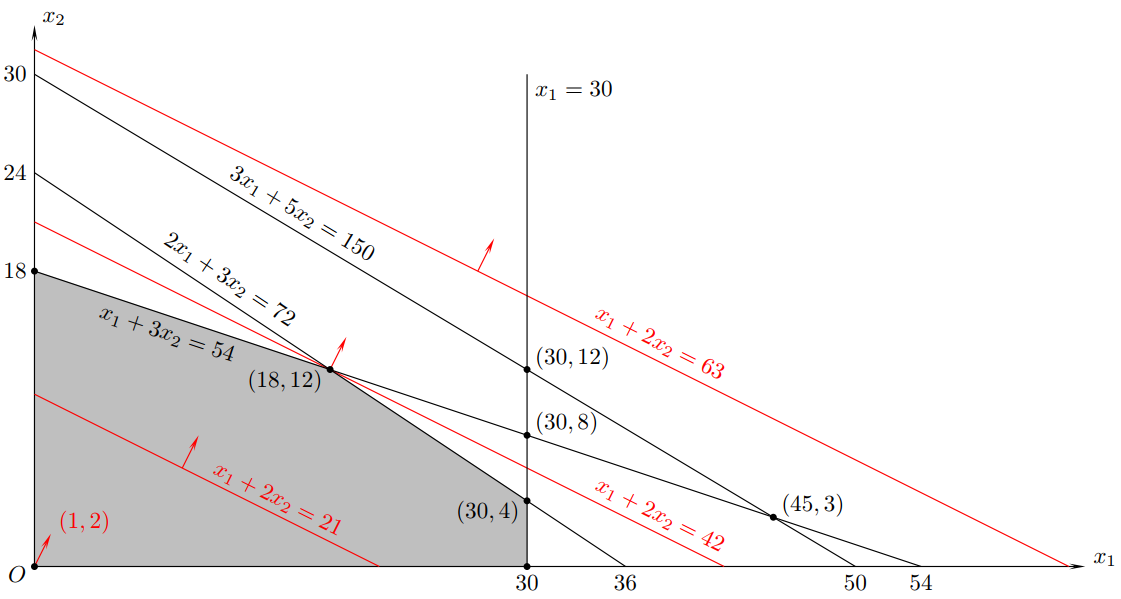

In [6]:
c = [-1000, -2000]
A = [[5, 15], [.5, 0], [120, 200], [10, 15]]
b = [270, 15, 6000, 360]

In [7]:
# Можно и не делать
c = np.array(c)
A = np.array(A)
b = np.array(b)

In [8]:
linprog(c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -42000.0
              x: [ 1.800e+01  1.200e+01]
            nit: 2
          lower:  residual: [ 1.800e+01  1.200e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  6.000e+00  1.440e+03  0.000e+00]
                 marginals: [-6.667e+01 -0.000e+00 -0.000e+00 -6.667e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [58]:
c = [-1, -2]
A = [[1, 3], [1, 0], [3, 5], [2, 3]]
b = [54, 30, 150, 72]

In [59]:
linprog(c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -42.0
              x: [ 1.800e+01  1.200e+01]
            nit: 3
          lower:  residual: [ 1.800e+01  1.200e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.200e+01  3.600e+01  0.000e+00]
                 marginals: [-3.333e-01 -0.000e+00 -0.000e+00 -3.333e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

Поменяем немного условия:

In [60]:
b = [53, 25, 150, 71]

linprog(c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -41.33333333333333
              x: [ 1.800e+01  1.167e+01]
            nit: 3
          lower:  residual: [ 1.800e+01  1.167e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  7.000e+00  3.767e+01  0.000e+00]
                 marginals: [-3.333e-01 -0.000e+00 -0.000e+00 -3.333e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

Решение получилось дробным, хотя по смыслу оно должно быть целочисленным

In [61]:
linprog(c, A_ub=A, b_ub=b, integrality=1, method='highs')

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -41.0
              x: [ 1.900e+01  1.100e+01]
            nit: -1
          lower:  residual: [ 1.900e+01  1.100e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.000e+00  6.000e+00  3.800e+01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: -41.0
        mip_gap: 0.0

# Используем Modeling Language

В практических задачах линейного программирования количество неизвестных и ограничений может достигать сотен тысяч и более. Матрицы ограничений при этом разреженные. В этом случае для описания задачи удобно пользоваться одним из **языков моделирования**. 

In [12]:
!pip install pulp
import pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 81.5 MB/s eta 0:00:00


In [28]:
prob = pulp.LpProblem("Chairs_and_Tables", pulp.LpMaximize)

In [29]:
Chairs = pulp.LpVariable("Chairs", 0, None, pulp.LpInteger)
Tables = pulp.LpVariable("Tables", 0, None, pulp.LpInteger)

Целевая функция:

In [30]:
prob += 1000*Chairs + 2000*Tables 

Ограничения:

In [31]:
prob +=   5*Chairs +  15*Tables <= 270
prob +=  .5*Chairs              <= 15
prob += 120*Chairs + 200*Tables <= 6000
prob +=  10*Chairs +  15*Tables <= 360


In [32]:
# prob.writeLP("Chairs_and_Tables.lp") # Можно сохранить

In [33]:
prob

Chairs_and_Tables:
MAXIMIZE
1000*Chairs + 2000*Tables + 0
SUBJECT TO
_C1: 5 Chairs + 15 Tables <= 270

_C2: 0.5 Chairs <= 15

_C3: 120 Chairs + 200 Tables <= 6000

_C4: 10 Chairs + 15 Tables <= 360

VARIABLES
0 <= Chairs Integer
0 <= Tables Integer

In [34]:
prob.solve()

1

In [35]:
print("Status:", pulp.LpStatus[prob.status])

Status: Optimal


In [36]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

Chairs = 18.0
Tables = 12.0


In [37]:
print("Optimal value = ", pulp.value(prob.objective))

Optimal value =  42000.0
